## 新想法
1. 每日更新股價資料檔案（已完成）   
    a. 每日收盤時執行  
    b. 更新當天的收盤資訊


2. 每日收盤時執行並判斷（預先設定好要關注的標的）  
    a. 爬取當天收盤資訊並分析  
    b. 出現明確買賣點透過line回傳  
    c. 分析該檔股價的權證資料  
    d. 篩選出適合的權證標的  


3. 關於分析收盤資訊（技術分析）  
    a. 布林通道策略  
        i. 窄寬通道的判斷  
        ii. 上下軌道斜率判斷  
        iii. Ｋ棒突破、成交量判斷。
    b. 三大法人的成交量（外資）  
    c. 記錄交易資訊與判斷資訊  
    
    
4. 關於分析權證資訊

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import mplfinance as mpf
mpf.__version__

'0.12.9b1'

https://ithelp.ithome.com.tw/articles/10233234  
Day 27 : 股市 K 線 LINE 聊天機器人實作 (功能實作)  
https://ithelp.ithome.com.tw/articles/10241574  

建立bbands教材，詳細說明策略的想法，並實際計算績效
1. 畫出bbands，並且沒有出現空缺
2. 完成不同策略的判斷、並畫出買賣點
3. 分析此策略的績效並改進

In [4]:
import os
path = "C:/Users/Landis/Desktop/pystocks"
lists = [i for i in os.listdir(path) if '.csv' in i]
print(lists)

['0050.csv', '2317.csv', '2330.csv', '2610.csv']


<bound method NDFrame.head of               Open    High     Low   Close  Volume
Date                                              
2022-08-08  119.00  119.25  118.30  119.25    8621
2022-08-09  118.40  119.50  118.00  119.15    7824
2022-08-11  119.80  120.45  119.60  120.05   10696
2022-08-12  120.55  121.00  120.30  120.80    8392
2022-08-15  121.45  122.10  121.25  121.90    9516
2022-08-16  122.00  122.30  121.90  122.10    9805>


C:\Users\Landis\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


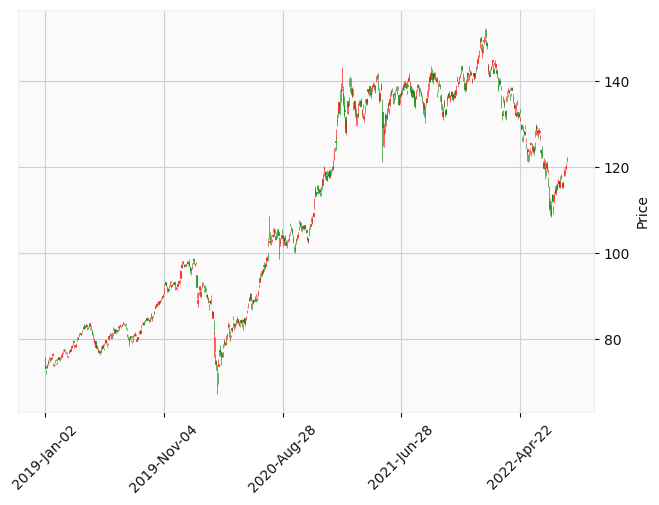

In [5]:
import pandas as pd
import mplfinance as mpf
# 讀取股票檔案，最新100筆資料
SData = pd.read_csv('0050.csv',index_col='Date')
# 更改時間格式
SData.index = pd.DatetimeIndex(SData.index)
print(SData.iloc[-6:,:].head)
mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
mpf.plot(SData, type='candle', style =s)

In [6]:
print(len(SData))

880


## 建立布林通道函式
1. 布林通道的定義為，K為標準差數量，N為過去幾筆資料:

    中軌 = N時間段的簡單移動平均線

    上軌 = 中軌 + K * N時間段的標準差

    下軌 =  中軌 - K * N時間段的標準差


2. 圖中藍線是上軌、橘線是中軌、綠色是下軌，常用的計算方式為N = 20、K = 2，也就是說中軌的每個點都是前20筆價格的平均

 

3. 標準差的計算方式為N時間段的每筆數值減去平均值的平方和再除以N後開根號，計算出來的標準差代回到布林通道的公式中就可以得到上下軌



In [7]:
def BBands(data, period=20, std_num=2):
    
    res = data.copy(deep=True)                                   # 取得data資料
    res['b_mid'] = data['Close'].rolling(period).mean()  # 計算中線(20日均線)
    std = data['Close'].rolling(period).std(ddof=0)              # 計算用於上下軌的標準差
    res['b_up'] = res['b_mid'] + std * std_num   # 計算上軌
    res['b_low'] = res['b_mid'] - std * std_num   # 計算下軌

    return res

In [8]:
SData = pd.read_csv('2330.csv',index_col='Date')
SData.index = pd.DatetimeIndex(SData.index)   # 更改時間格式
#print(SData)

bbands_data = BBands(SData)   # 將股價資訊經過BBands函式計算
#print(bbands_data)

# 新增布林通道後資訊
print(bbands_data.columns)
print(bbands_data)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'b_mid', 'b_up', 'b_low'], dtype='object')
             Open   High    Low  Close  Volume    b_mid        b_up  \
Date                                                                  
2017-01-03  181.5  183.5  181.0  183.0   23551      NaN         NaN   
2017-01-04  183.0  184.0  181.5  183.0   24482      NaN         NaN   
2017-01-05  182.0  183.5  181.5  183.5   21374      NaN         NaN   
2017-01-06  184.0  184.5  183.5  184.0   23121      NaN         NaN   
2017-01-09  184.0  185.0  183.0  184.0   18584      NaN         NaN   
...           ...    ...    ...    ...     ...      ...         ...   
2022-08-09  507.0  511.0  504.0  510.0   21109  498.250  519.784855   
2022-08-11  513.0  514.0  510.0  514.0   23679  500.425  518.875677   
2022-08-12  515.0  518.0  514.0  517.0   19407  502.525  518.287217   
2022-08-15  520.0  524.0  519.0  523.0   21204  504.050  521.453735   
2022-08-16  526.0  526.0  523.0  525.0   20672  505.525 

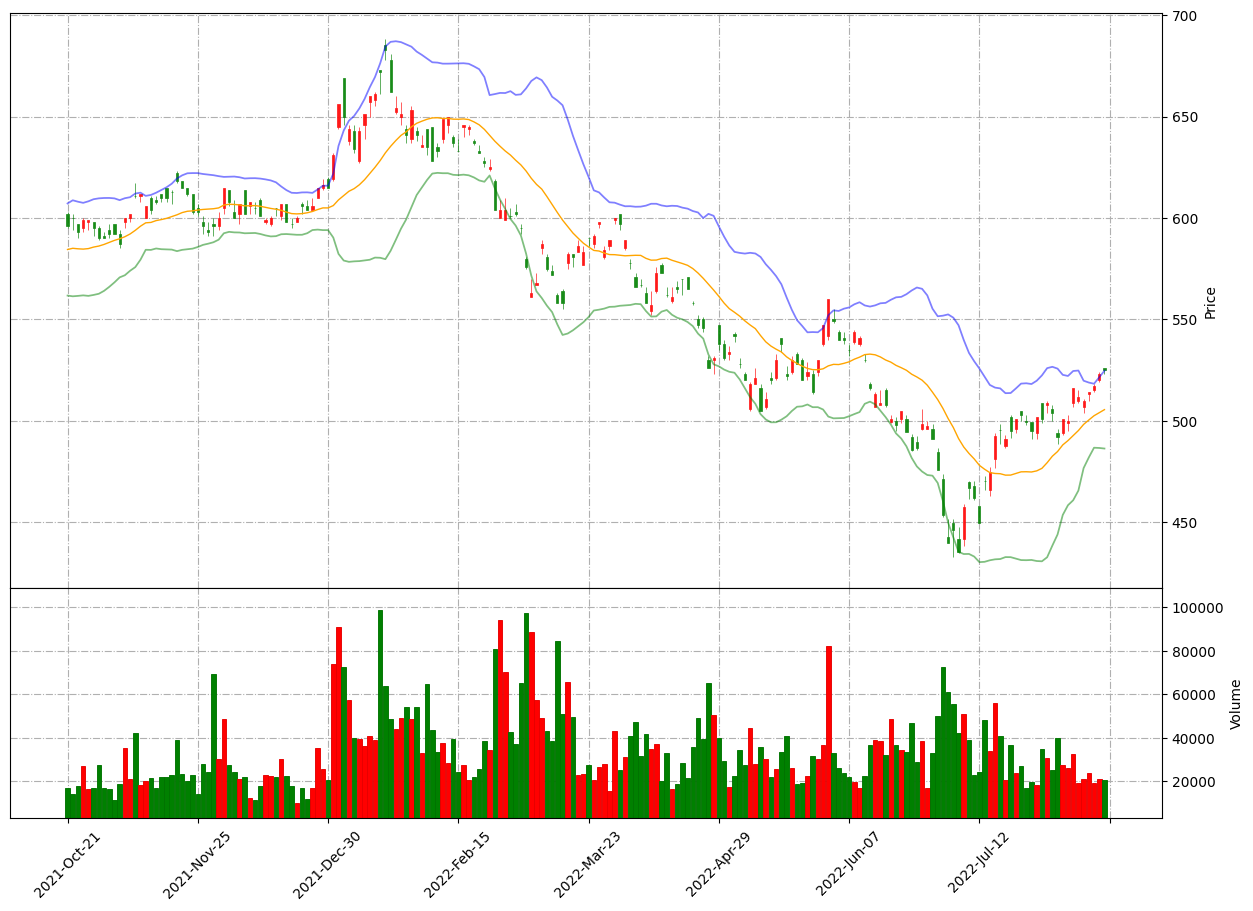

In [9]:
day_num = 200                            # 設定顯示股價資訊的天數
bbands_data = BBands(SData)              # 將股價資訊經過BBands函式計算
#print(bbands_data)

# 繪製布林通道線圖
addplots = [
            mpf.make_addplot(bbands_data['b_mid'][-day_num:], panel=0, color='orange', alpha=1
                             , width=1, secondary_y=False),
            mpf.make_addplot(bbands_data['b_up'][-day_num:], color = 'blue', alpha=0.5),
            mpf.make_addplot(bbands_data['b_low'][-day_num:], color = 'green', alpha=0.5)
           ]

# 設置k線圖顏色
my_color = mpf.make_marketcolors(up='red',      # 上漲顏色
                                 down='green',  # 下跌顏色
                                 edge='i',      # 隱藏 K 線邊緣
                                 volume='in',   # 成交量用同樣的顏色
                                 inherit=True)  # 繼承其他參數
# 設置圖型呈現
my_style = mpf.make_mpf_style(gridaxis='both',          # 設置網格
                              gridstyle='-.',           # 設定網格花樣
                              y_on_right=True,          # y 座標放右邊
                              marketcolors=my_color)    # 設定k線圖顏色

kwargs = dict(type = 'candle', 
              figscale = 2, # 設定圖型大小
              style = my_style)

_panel = 2
mpf.plot(SData.iloc[-day_num:,:],
         #mav = [10, 20, 60],
         **kwargs,
         num_panels=_panel,          # 設定總層數
         main_panel=0,               # 設定 K 線圖層數
         volume=True,              # 設定是否繪製成交量 
         volume_panel=_panel - 1,    # 設定成交量層數             
         show_nontrading=False,      # 忽略非交易日
         tight_layout=False,          # 設定布局方式
         addplot = addplots)

In [10]:
bbands_data.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
               '2022-08-08', '2022-08-09', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=1373, freq=None)

In [11]:
bbands_data.loc['2021-01-04', 'Low']

528.0

In [12]:
SData.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [13]:
# pandas test
import pandas as pd
column = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利', '剩餘金額', '報酬率%']]
detail = pd.DataFrame(columns=column)
detail

,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額,報酬率%


In [14]:
# 將多維list 轉換成dict
table = [
            ['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利', '剩餘金額', '報酬率%'],
            ['2017-02-13','+1000','187.5','187.8','-187800','-187800','312200','-'],
            ['2017-02-13','+1000','187.5','187.8','-187800','-187800','312200','-']
         ]
key = table.pop(0)
print('key:',key)
print('len(table)',len(table))
detail = dict()
for i in range(len(key)):
    temp = []
    for j in range(len(table)):
        temp.append(table[j][i])
    detail[key[i]] = temp
print('\ndetail:\n',detail)
df = pd.DataFrame(detail)
df

key: ['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利', '剩餘金額', '報酬率%']
len(table) 2

detail:
 {'日期': ['2017-02-13', '2017-02-13'], '買/賣(+/-)': ['+1000', '+1000'], '價格': ['187.5', '187.5'], '價格(稅)': ['187.8', '187.8'], '實際花費': ['-187800', '-187800'], '目前獲利': ['-187800', '-187800'], '剩餘金額': ['312200', '312200'], '報酬率%': ['-', '-']}


,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額,報酬率%
0,2017-02-13,+1000,187.5,187.8,-187800,-187800,312200,-
1,2017-02-13,+1000,187.5,187.8,-187800,-187800,312200,-


In [15]:
table = [
            ['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利', '剩餘金額', '報酬率%'],
            ['2017-02-13','+1000','187.5','187.8','-187800','-187800','312200','-'],
            ['2017-02-13','+1000','187.5','187.8','-187800','-187800','312200','-']
         ]
df = pd.DataFrame(table[1:],columns=table[0])
df

,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額,報酬率%
0,2017-02-13,+1000,187.5,187.8,-187800,-187800,312200,-
1,2017-02-13,+1000,187.5,187.8,-187800,-187800,312200,-


In [16]:
# 測試計算 當前購買平均股價
table = [
            ['日期', '買/賣(+/-)', '成交價', '價格(稅)', '實際花費', '目前獲利', '剩餘金額', '報酬率%'],
            ['2021-07-13','+100',48.1,48.1*1.000855,'-187800','-187800','312200','-'],
            ['2021-07-13','+100',47.4,47.4*1.000855,'-187800','-187800','312200','-']
         ]
df = pd.DataFrame(table[1:],columns=table[0])
buy_temp = df[df['買/賣(+/-)'].str.startswith('+')]                # 過濾出只有買進的交易資訊
t = buy_temp.loc[0:5][['買/賣(+/-)','價格(稅)']].iloc[::-1]
print(t)
temp_stock = 200
cost = 0
for i in t.values:
    
    num = int(i[0].strip('+'))
    temp_stock-=num
    if temp_stock>=0:
        cost += round(num * i[1])
print('總花費:',cost)
print('平均每股價格：', cost/200)

  買/賣(+/-)      價格(稅)
1     +100  47.440527
0     +100  48.141126
總花費: 9558
平均每股價格： 47.79


In [17]:
# 當前購買平均股價
def avg_cost(df,stock, info=False):
    buy_only = df[df['買/賣(+/-)'].str.startswith('+')]
    data = buy_only[['買/賣(+/-)','價格(稅)']].iloc[::-1]
    temp_stock = stock
    cost = 0
    for i in data.values:
        num = int(i[0].strip('+'))
        temp_stock-=num
        if temp_stock>=0:
            cost += round(num * i[1])
        else:
            break
    if info:
        print(data)
        print('當前持有成本為:',cost)
        print('可下單股數為:',stock)
    print('平均每股價格：', round(cost/stock,2))
    return round(cost/stock,2)

In [117]:
def BBands(data, period=20, std_num=2):
    res = data.copy(deep=True)                                   # 取得data資料
    res['b_mid'] = data['Close'].rolling(period).mean()          # 計算中線(20日均線)
    std = data['Close'].rolling(period).std(ddof=0)              # 計算用於上下軌的標準差
    res['b_up'] = res['b_mid'] + std * std_num                   # 計算上軌
    res['b_low'] = res['b_mid'] - std * std_num                  # 計算下軌
    b_slope = [np.nan]
    ma_slope = [np.nan]
    b_width = [np.nan]
    t = res.index
    for i in range(1, len(res)):
        slope = (res.loc[t[i], 'b_up']/res.loc[t[i-1], 'b_up']-1) * 100        # 計算布林通道上軌斜率
        b_slope.append(slope)
        slope = (res.loc[t[i], 'b_mid']/res.loc[t[i-1], 'b_mid']-1) * 100    # 計算中線斜率
        ma_slope.append(slope)
        width = (res.loc[t[i], 'b_up']/res.loc[t[i], 'b_low']-1) * 100         # 計算布林通道寬度
        print('test_width',type(width))
        print(res.loc[t[i], 'b_up'])
        b_width.append(width)
    res['bband_slope'] = b_slope
    res['bband_width'] = b_width
    res['mid_slope'] = ma_slope
    return res

## 建立回測規則函式

In [118]:
def update(detail,day,dec,close,price,buy,gain,money,stock):
    temp_detail = []
    temp_detail.append(day)                                                        #交易日期
    temp_detail.append(dec)                                                        #買賣 num股
    temp_detail.append(close)                                                      #成交價格: "收盤價"
    temp_detail.append(price)                                                      #持有成本(含稅)
    temp_detail.append(buy)                                                        #實際花費 buy元
    temp_detail.append(gain)                                                       #目前獲利
    temp_detail.append(money)                                                      #剩餘金額
    if dec[0]=='+':
        stock += int(dec[1:])
    else:
        stock -= int(dec[1:])
    temp_detail.append(stock)                                                      #更新庫存張數
    detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
    detail_pd = pd.DataFrame(detail[1:],columns=detail[0])                         #將交易記錄製作成 DataFrame 
    return detail_pd,stock

In [119]:
import math
import pandas as pd

# 記錄買賣資訊 
def buy_or_sell(day, decide, close, type_=1):
    global money, gain, buy, detail, stock, buy_unit, sell_unit, price, detail_pd, avg_price
    
    if decide == 'buy' and  money > 0 : 
        price = round(close * 1.001425, 1)                                             #計算含稅的股價
        
        if type_ == 1:                                                                 # type_1: 分段進場
            num = math.floor(buy_unit/price)                                           # 計算分段進場能購買的股數
            if (money- round(num*price)) > 0:                                              
                num = num                                                                 
            else:
                num = math.floor(money/price) 
        elif type_ == 2:                                                               # type_2: 全數進場
            num = math.floor(money/price)                                              # 計算剩餘金額能購買的股數
        
        buy = round(num*price)                                                         #計算實際花費
        money = money-buy                                                              #更新 money
        gain -= buy                                                                    #計算淨收益(含稅)
        detail_pd,stock = update(detail,day,'+' + str(num),close,price,'-' + str(buy),gain,money,stock)
        sell_unit = round(stock/5)                                                     #更新每次賣出單位
        
    elif decide == 'sell':       
        price = round(close * 0.995575)                                                #計算含稅的股價 
        
        if type_ == 1:                                                                 # type_1: 分段出場
            if (stock - sell_unit) > 0:                                                #計算購買股數
                num = sell_unit                                                                 
            else:
                num = stock
        elif type_ == 2:                                                               # type_2: 全數出場
            print(day,'全數出場!')
            num = stock   
        
        sell = round(close * 0.995575 * num)                                           # 計算實際收入
        money = money + sell                                                           # 更新 money
        gain += sell                                                                   # 淨收益計算
        detail_pd,stock = update(detail,day,'-' + str(num),close,price,'+' + str(buy),gain,money,stock)
        buy_unit = round(money/5)                                                      #更新每次進場金額
        
    elif decide == 'over':
        sell = round(close * 0.995575 * stock)                                         # 計算實際收入
        money = money + sell                                                           # 更新 money
        gain += sell                                                                   # 淨收益計算
        num = stock                                                                    #將持有的股數全數出清
        detail_pd,stock = update(detail,day,'-' + str(num),close,round(close * 0.995575),'+' + str(buy),gain,money,stock)
        

In [120]:
import numpy as np
def bbands_rule(_ticker, bb_period=20, bb_stdnum=2, use_detail=False):
    
    # 複製一份資料，避免修改原始資料
    res = _ticker.copy(deep=True)
  
    # 檢查使否存在要用的指標
    try:
        if not {'b_mid', 'b_up', 'b_low'}.issubset(res.columns):
            res = BBands(res, bb_period, bb_stdnum)
    except Exception as e:
        print(e)
        return False

    temp = 494.0 * 0.01                                                                # 設定買賣點的距離
    buy_1 = [np.nan]*len(res)
    buy_2 = [np.nan]*len(res)
    sell_1 = [np.nan]*len(res)
    w_15 = [np.nan]*len(res)
    w_10 = [np.nan]*len(res)
    sell_2 = [np.nan]*len(res)
    new_price = 0                                                                          # 最後進場價格
    buy2 = False                                                                           # 策略二是否進場

    # 取得 index 值(日期)，方便計算使用
    t = res.index

    for i in range(1, len(res)):
        decide = ''
        trade_type = 1                                                                     # 預設交易模式: 分段進出場
        width = res.loc[t[i], 'bband_width']
        print('width',width)
        slope2 = res.loc[t[i], 'mid_slope']
        # 計算是否符合買進條件
        if width > 15:                                                                     # 策略一: 通道寬度大於15%
            w_15[i] = res.loc[t[i], 'b_low']
            if res.loc[t[i], 'Low'] < res.loc[t[i], 'b_low']:                              # K棒碰觸到下軌
                buy_1[i] = res.loc[t[i], 'Low'] - temp                                     # 標示座標點(深藍色)
                decide = 'buy'
   
        elif width <= 10:                                                                  # 策略二: 通道寬度小於10%
            w_10[i] = res.loc[t[i], 'b_low']                                                                
            if (res.loc[t[i], 'Close'] > res.loc[t[i], 'Open']) and res.loc[t[i], 'Close'] > res.loc[t[i], 'b_up']:
                buy_2[i] = res.loc[t[i], 'Low'] - temp                                     # 標示座標點(淡藍色)
                new_price = res.loc[t[i], 'Close']
                #print(t[i],'buy2:',slope2,'close:',res.loc[t[i], 'Close'])
                decide = 'buy'
                if slope2 > 0.05:                                                         # 如果20日均線斜率>5%
                    trade_type = 2                                                        # 剩餘金額全數進場
                buy2 = True
                
        # 計算是否符合做空首要條件
        if ((res.loc[t[i], 'b_up']/res.loc[t[i], 'b_low']-1) * 100) > 15: # 通道寬度大於15%
            if res.loc[t[i], 'Close'] > res.loc[t[i], 'b_up']:                            # 收盤價突破上軌
                sell_1[i] = res.loc[t[i], 'High'] + temp
                decide = 'sell'
                buy2 = False
        if buy2 and new_price < res.loc[t[i], 'Close']:
            #print(t[i],bbands_data.loc[t[i], 'b_up'],res.loc[t[i], 'Close'])             # 判斷股價是否離開上軌
            if res.loc[t[i], 'Close'] < res.loc[t[i], 'b_up'] :
                sell_2[i] = res.loc[t[i], 'High'] + temp
                #decide = 'sell'
                if slope2 < 0.05:                                                         # 如果20日均線斜率 < 5%
                    trade_type = 2                                                        # 剩餘金額全數出場
                buy2 = False
        
        if use_detail:
            buy_or_sell(t[i].date(), decide, res.loc[t[i], 'Close'],trade_type)                         # 記錄交易資訊
    
    if use_detail:
        decide = 'over'                                                                      #將持有的股數全數出清
        buy_or_sell(t[i].date(), decide, res.loc[t[i], 'Close'])        
    
    res['buy_point'] = buy_1
    res['buy2_point'] = buy_2
    res['sell_point'] = sell_1
    res['sell2_point'] = sell_2
    res['w_15'] = w_15
    res['w_10'] = w_10
    
    return res

## 關於新增線圖的設定(官方文檔)
https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb

In [121]:
# 設定讀取股票資料
path = "C:/Users/Landis/Desktop/pystocks"
s = '0056.csv'
SData = pd.read_csv(path+'/'+s,index_col='Date')
SData.index = pd.DatetimeIndex(SData.index) 
# range
day_num = '2019-01-03'                        # 設定顯示股價資訊起始日期
day_end = '2020-08-15'                        # 設定顯示股價資訊結束日期

detail = [['日期', '買/賣(+/-)', '成交價', '價格(稅)', '實際花費', '目前獲利', '剩餘金額', '報酬率%', '庫存']]
bbands_data = bbands_rule(SData)              # 將股價資訊經過BBands函式計算

# 設置k線圖顏色
my_color = mpf.make_marketcolors(up='red',      # 上漲顏色
                                 down='green',  # 下跌顏色
                                 edge='i',      # 隱藏 K 線邊緣
                                 volume='in',   # 成交量用同樣的顏色
                                 inherit=True)  # 繼承其他參數
# 設置圖型呈現
my_style = mpf.make_mpf_style(gridaxis='both',          # 設置網格
                              gridstyle='-.',           # 設定網格花樣
                              y_on_right=True,          # y 座標放右邊
                              marketcolors=my_color)    # 設定k線圖顏色

# 繪製買賣點圖
bband_line = bbands_data[['b_mid','b_up','b_low']][day_num:day_end]
addplots = [
    mpf.make_addplot(bband_line, panel=0,linestyle='dashdot'),
]
if not bbands_data['buy_point'][day_num:day_end].isnull().all():
    addplots+=[mpf.make_addplot(bbands_data['buy_point'][day_num:day_end], color = 'blue', alpha=1, type='scatter', marker='^', markersize=100)]
if not bbands_data['buy2_point'][day_num:day_end].isnull().all():
    addplots+=[mpf.make_addplot(bbands_data['buy2_point'][day_num:day_end], color = 'cyan', alpha=1, type='scatter', marker='^', markersize=100)]
if not bbands_data['sell_point'][day_num:day_end].isnull().all():
    addplots+=[mpf.make_addplot(bbands_data['sell_point'][day_num:day_end], color = 'darkred', alpha=1, type='scatter', marker='v', markersize=100)]
if not bbands_data['sell2_point'][day_num:day_end].isnull().all():
    addplots+=[mpf.make_addplot(bbands_data['sell2_point'][day_num:day_end], color = 'red', alpha=0.5, type='scatter', marker='v', markersize=100)]

    
# #繪製布林通道
width_15 = dict(y1 = bbands_data['w_15'][day_num:day_end].values,y2 = bbands_data['b_up'][day_num:day_end].values,panel=0,alpha=0.5,color='gold')
width_10 = dict(y1 = bbands_data['w_10'][day_num:day_end].values,y2 = bbands_data['b_up'][day_num:day_end].values,panel=0,alpha=0.5,color='greenyellow')

_panel = 2
mpf.plot(SData.loc[day_num:day_end,:],
         #mav = [10, 60],
         **kwargs,
         num_panels=_panel,           # 設定總層數
         main_panel=0,                # 設定 K 線圖層數
         volume=True,                 # 設定是否繪製成交量 
         volume_panel=_panel - 1,     # 設定成交量層數             
         show_nontrading=False,       # 忽略非交易日
         tight_layout=True,          # 設定是否緊密布局
         datetime_format='%Y-%m-%d',
         addplot = addplots,
         fill_between=[width_15,width_10]
        )

test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
23.877590926920217
test_width <class 'numpy.float64'>
23.993660610855486
test_width <class 'numpy.float64'>
24.101359725944363
test_width <class 'numpy.float64'>
24.230131292607325
test_width <class 'numpy.float64'>
24.337374516418024
test_width <class 'numpy.flo

test_width <class 'numpy.float64'>
26.25057905523337
test_width <class 'numpy.float64'>
26.249786192708477
test_width <class 'numpy.float64'>
26.25092522057971
test_width <class 'numpy.float64'>
26.233953157678528
test_width <class 'numpy.float64'>
26.228685124032204
test_width <class 'numpy.float64'>
26.219081249128184
test_width <class 'numpy.float64'>
26.215494827524882
test_width <class 'numpy.float64'>
26.212406231682465
test_width <class 'numpy.float64'>
26.19222950070709
test_width <class 'numpy.float64'>
26.16088778452794
test_width <class 'numpy.float64'>
26.144557088117576
test_width <class 'numpy.float64'>
26.19110414783561
test_width <class 'numpy.float64'>
26.251502610957267
test_width <class 'numpy.float64'>
26.286495385427568
test_width <class 'numpy.float64'>
26.330326789326723
test_width <class 'numpy.float64'>
26.32777734136327
test_width <class 'numpy.float64'>
26.317545820887077
test_width <class 'numpy.float64'>
26.312026517649315
test_width <class 'numpy.float64'>

test_width <class 'numpy.float64'>
27.228872262051695
test_width <class 'numpy.float64'>
27.068606156083785
test_width <class 'numpy.float64'>
26.823576909432965
test_width <class 'numpy.float64'>
26.535859794131014
test_width <class 'numpy.float64'>
26.348366079213058
test_width <class 'numpy.float64'>
26.210414659451484
test_width <class 'numpy.float64'>
26.201007475021203
test_width <class 'numpy.float64'>
26.20693420577976
test_width <class 'numpy.float64'>
26.17167944964784
test_width <class 'numpy.float64'>
26.182000000000023
test_width <class 'numpy.float64'>
26.21839669156856
test_width <class 'numpy.float64'>
26.253104707355664
test_width <class 'numpy.float64'>
26.37564478875223
test_width <class 'numpy.float64'>
26.514493716649305
test_width <class 'numpy.float64'>
26.599040027945986
test_width <class 'numpy.float64'>
26.683218059221737
test_width <class 'numpy.float64'>
26.723990753851016
test_width <class 'numpy.float64'>
26.749200080680666
test_width <class 'numpy.float64

test_width <class 'numpy.float64'>
30.359965357274618
test_width <class 'numpy.float64'>
30.310499333332864
test_width <class 'numpy.float64'>
30.202340849808166
test_width <class 'numpy.float64'>
30.112149438352585
test_width <class 'numpy.float64'>
30.103999999999658
test_width <class 'numpy.float64'>
30.17944456665934
test_width <class 'numpy.float64'>
30.202713765684152
test_width <class 'numpy.float64'>
30.250930208693983
test_width <class 'numpy.float64'>
30.41971146808878
test_width <class 'numpy.float64'>
30.57696484565586
test_width <class 'numpy.float64'>
30.689388788917228
test_width <class 'numpy.float64'>
30.778033071414384
test_width <class 'numpy.float64'>
30.809794537158453
test_width <class 'numpy.float64'>
30.815635814667992
test_width <class 'numpy.float64'>
30.83259653504408
test_width <class 'numpy.float64'>
30.883478311721085
test_width <class 'numpy.float64'>
30.983635822478583
test_width <class 'numpy.float64'>
31.072283654631832
test_width <class 'numpy.float64

test_width <class 'numpy.float64'>
33.57943432682711
test_width <class 'numpy.float64'>
33.65503533458511
test_width <class 'numpy.float64'>
33.80655854918369
test_width <class 'numpy.float64'>
33.86130593481303
test_width <class 'numpy.float64'>
33.914575859233594
test_width <class 'numpy.float64'>
33.88736915620575
test_width <class 'numpy.float64'>
33.88385296651047
test_width <class 'numpy.float64'>
33.88273390609014
test_width <class 'numpy.float64'>
33.85052862734319
test_width <class 'numpy.float64'>
33.776698386792425
test_width <class 'numpy.float64'>
33.694081077907875
test_width <class 'numpy.float64'>
33.605240428022654
test_width <class 'numpy.float64'>
33.515562629513816
test_width <class 'numpy.float64'>
33.380873262636136
test_width <class 'numpy.float64'>
33.33847280967629
test_width <class 'numpy.float64'>
33.446614776658095
test_width <class 'numpy.float64'>
33.42684952146412
test_width <class 'numpy.float64'>
33.32304602110903
test_width <class 'numpy.float64'>
33.2

width 2.6043030806644163
width 3.1576841319737703
width 3.8507303841670337
width 4.268518753160411
width 4.652673185031597
width 5.101921079041261
width 5.203563259256261
width 5.252884215957665
width 5.10562544941382
width 4.929585867627573
width 4.830908331797756
width 4.66715350163589
width 4.498454644678351
width 4.373155052104227
width 4.037278460980076
width 3.7046844641741794
width 3.4604134667396425
width 3.0811448170151134
width 2.994520289779068
width 2.9891571351039925
width 3.0206892662425266
width 3.217570335890785
width 3.354927165622401
width 3.430733519451712
width 3.3557041070951144
width 2.943624639938802
width 2.615392288963192
width 2.178489829626873
width 1.8698607140070322
width 1.937874736398948
width 2.063682762739183
width 2.0520468376818535
width 2.1227549855144634
width 2.1407115177615177
width 2.2517469579139915
width 2.3581892509142666
width 2.4783954339221648
width 2.378598349853589
width 2.237528658604915
width 2.018838765789299
width 1.9593773839991613
w

width 4.768840199693369
width 4.772826998266755
width 4.774821096212589
width 4.7523235083648085
width 4.7731662857880774
width 4.725895297014215
width 4.64126512724623
width 4.47101842146973
width 4.174596356108484
width 4.017502369231596
width 3.9351768328423242
width 4.0775775174989315
width 4.715250063271759
width 4.946692122476382
width 5.4076385624652445
width 9.226122106766033
width 11.073837017286014
width 12.74306178315625
width 13.63500350036877
width 14.111953988853676
width 14.417175273777282
width 14.536529185112034
width 14.310388327023293
width 16.084857650547345
width 17.21548815513041
width 18.87749086736332
width 20.27737965854253
width 21.27635159612824
width 21.481234621661205
width 20.825927822144074
width 19.769294262948645
width 18.54116358082143
width 17.5207697746957
width 15.681120801957892
width 14.00784719419672
width 13.917417159131151
width 13.569316974920298
width 13.23262131341476
width 12.575339933630847
width 11.565647036845238
width 10.259725083942794

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [93]:
print(width)

NameError: name 'width' is not defined

In [124]:
path = "C:/Users/Landis/Desktop/pystocks"
s = '0056.csv'
SData = pd.read_csv(path+'/'+s,index_col='Date')
SData.index = pd.DatetimeIndex(SData.index) 
SData
bbands_data = BBands(SData) 
bbands_data

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,23.12,23.13,23.07,23.12,1141
2017-01-04,23.12,23.21,23.12,23.20,914
2017-01-05,23.25,23.28,23.21,23.28,1072
2017-01-06,23.28,23.37,23.28,23.34,1444
2017-01-09,23.37,23.41,23.27,23.30,1088
...,...,...,...,...,...
2022-08-15,29.32,29.32,29.11,29.22,22996
2022-08-16,29.21,29.25,29.11,29.24,18023
2022-08-17,29.23,29.28,29.16,29.28,10449


test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
nan
test_width <class 'numpy.float64'>
23.877590926920217
test_width <class 'numpy.float64'>
23.993660610855486
test_width <class 'numpy.float64'>
24.101359725944363
test_width <class 'numpy.float64'>
24.230131292607325
test_width <class 'numpy.float64'>
24.337374516418024
test_width <class 'numpy.flo

test_width <class 'numpy.float64'>
26.250374963127022
test_width <class 'numpy.float64'>
26.25057905523337
test_width <class 'numpy.float64'>
26.249786192708477
test_width <class 'numpy.float64'>
26.25092522057971
test_width <class 'numpy.float64'>
26.233953157678528
test_width <class 'numpy.float64'>
26.228685124032204
test_width <class 'numpy.float64'>
26.219081249128184
test_width <class 'numpy.float64'>
26.215494827524882
test_width <class 'numpy.float64'>
26.212406231682465
test_width <class 'numpy.float64'>
26.19222950070709
test_width <class 'numpy.float64'>
26.16088778452794
test_width <class 'numpy.float64'>
26.144557088117576
test_width <class 'numpy.float64'>
26.19110414783561
test_width <class 'numpy.float64'>
26.251502610957267
test_width <class 'numpy.float64'>
26.286495385427568
test_width <class 'numpy.float64'>
26.330326789326723
test_width <class 'numpy.float64'>
26.32777734136327
test_width <class 'numpy.float64'>
26.317545820887077
test_width <class 'numpy.float64'>

test_width <class 'numpy.float64'>
28.138769721730352
test_width <class 'numpy.float64'>
28.209581588964344
test_width <class 'numpy.float64'>
28.228824654254794
test_width <class 'numpy.float64'>
28.20787308486415
test_width <class 'numpy.float64'>
28.170331453777084
test_width <class 'numpy.float64'>
28.111220227850122
test_width <class 'numpy.float64'>
28.005219983869043
test_width <class 'numpy.float64'>
27.89293253283547
test_width <class 'numpy.float64'>
27.78302713679227
test_width <class 'numpy.float64'>
27.655477760299558
test_width <class 'numpy.float64'>
27.48024997702629
test_width <class 'numpy.float64'>
27.228872262051695
test_width <class 'numpy.float64'>
27.068606156083785
test_width <class 'numpy.float64'>
26.823576909432965
test_width <class 'numpy.float64'>
26.535859794131014
test_width <class 'numpy.float64'>
26.348366079213058
test_width <class 'numpy.float64'>
26.210414659451484
test_width <class 'numpy.float64'>
26.201007475021203
test_width <class 'numpy.float64

test_width <class 'numpy.float64'>
29.44495660755476
test_width <class 'numpy.float64'>
29.541474815335174
test_width <class 'numpy.float64'>
29.690292593367214
test_width <class 'numpy.float64'>
29.827978662824194
test_width <class 'numpy.float64'>
29.906704890472053
test_width <class 'numpy.float64'>
30.004388224227217
test_width <class 'numpy.float64'>
30.067533690664604
test_width <class 'numpy.float64'>
30.091009541941226
test_width <class 'numpy.float64'>
30.142665171897203
test_width <class 'numpy.float64'>
30.17605147289945
test_width <class 'numpy.float64'>
30.1994646815098
test_width <class 'numpy.float64'>
30.252946326934733
test_width <class 'numpy.float64'>
30.30133956221032
test_width <class 'numpy.float64'>
30.371585892164536
test_width <class 'numpy.float64'>
30.359965357274618
test_width <class 'numpy.float64'>
30.310499333332864
test_width <class 'numpy.float64'>
30.202340849808166
test_width <class 'numpy.float64'>
30.112149438352585
test_width <class 'numpy.float64'

test_width <class 'numpy.float64'>
34.577994869760296
test_width <class 'numpy.float64'>
34.480603886260994
test_width <class 'numpy.float64'>
34.32942488432423
test_width <class 'numpy.float64'>
34.182725222412756
test_width <class 'numpy.float64'>
34.004646021913025
test_width <class 'numpy.float64'>
33.830565128787576
test_width <class 'numpy.float64'>
33.725874078706475
test_width <class 'numpy.float64'>
33.666148698327795
test_width <class 'numpy.float64'>
33.59588386008902
test_width <class 'numpy.float64'>
33.589008732674735
test_width <class 'numpy.float64'>
33.64237040779791
test_width <class 'numpy.float64'>
33.66368837722455
test_width <class 'numpy.float64'>
33.68920261163962
test_width <class 'numpy.float64'>
33.645949075949886
test_width <class 'numpy.float64'>
33.55965951577089
test_width <class 'numpy.float64'>
33.55791750087585
test_width <class 'numpy.float64'>
33.53795677473096
test_width <class 'numpy.float64'>
33.54726818294912
test_width <class 'numpy.float64'>
33

,Open,High,Low,Close,Volume,b_mid,b_up,b_low,bband_slope,bband_width,mid_slope
Date,,,,,,,,,,,
2017-01-03,23.12,23.13,23.07,23.12,1141,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,23.12,23.21,23.12,23.20,914,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,23.25,23.28,23.21,23.28,1072,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,23.28,23.37,23.28,23.34,1444,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,23.37,23.41,23.27,23.30,1088,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-15,29.32,29.32,29.11,29.22,22996,28.5615,29.401507,27.721493,0.068299,6.060327,0.305537
2022-08-16,29.21,29.25,29.11,29.24,18023,28.6395,29.425591,27.853409,0.081916,5.644487,0.273095
2022-08-17,29.23,29.28,29.16,29.28,10449,28.7035,29.479265,27.927735,0.182405,5.555515,0.223468


In [130]:
bbands_data.loc['2019-01-23', 'b_up']

Date
2019-01-23    24.616129
2019-01-23    27.813115
Name: b_up, dtype: float64

In [59]:
fill_between=width_15
type(fill_between)

dict

In [60]:
mpf.__version__

'0.12.9b1'

In [61]:
#紀錄交易資訊
detail = [['日期', '買/賣(+/-)', '成交價', '價格(稅)', '實際花費', '目前獲利', '剩餘金額', '庫存張數']]

initial = 500000                                                                    #初始金額
money = initial                                                                     #剩餘金額
stock = 0                                                                           #持有股票數量(股)
gain = 0                                                                            #目前獲利
buy_unit = round(money/5)                                                           #單次進場金額

bbands_data = bbands_rule(SData,use_detail=True) # 
#支出、收入、淨收益、投資報酬率
cost = initial
income = money     
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%") 

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3.8067654485218094
3.8124520660926198
3.8378001093554603
4.006378493064444
4.510322029701097
4.933123007588969
5.606700134370635
6.058963757176938
6.601622644677541
6.856186390534269
6.701384541458277
6.658740165170407
6.2802174931264165
5.633647332808778
4.956770785599618
4.88037970252162
4.847183973539071
4.918029040333449
5.067416836262328
4.96781603332197
4.796182587957887
4.629931152692612
4.720530883893814
4.656615188280644
4.692883872360243
4.700687297344319
4.8216854125888275
5.191140578455844
5.481799126177145
6.549973426862232
7.0612731166799
7.518980637310624
7.827221570535126
8.16536516318922
8.682513637740152
8.65519708453315
8.583398041673496
8.138207677824848
7.671357882831176
7.337932416879833
7.143501659756146
6.471940499683759
5.3381491146826665
4.811823790552228
4.010073960703564
3.3960102291935135
3.863387813196195
4.225380413236146
4.83152675096532
4.841900955621403
4.666091797484495
4.45088062

4.750597746295493
4.74993771326131
5.197624267598977
7.774701578412668
11.116326641459917
13.012429532709092
15.987072222072541
18.17351848485562
18.757121737008564
18.673791129012017
18.61003570285944
18.237981844868266
18.07090794160007
17.648693433261208
16.83543399129761
15.84233486365405
14.441331494466292
12.830946010538803
11.733706090637774
10.267022346795818
9.048669898941819
7.051371775770243
5.557309867470206
5.569927710477396
5.727128220536404
6.37154436653824
5.969039685283306
5.457061442029376
5.49676885930217
5.241067713656489
7.387581751244698
8.4188017300876
9.98642488090149
10.258840603458076
10.251110806922604
10.232145524636827
10.299245415853854
10.167195833179509
9.88845076206557
9.946287421740706
9.9835777023622
10.007901408130039
9.866117691502563
9.92157274109231
9.436658803288434
8.193000958287634
7.5529315162891075
7.628084405668889
7.577791005465095
7.689199621998255
7.7429003800500995
8.706956828188495
8.471422863941601
8.602208739522954
8.61009994999058
8.

19.84345913253145
22.81493939214927
24.476107956978808
25.643005244218564
24.281323291644206
22.806799254834775
22.220806258478333
22.167459088164286
21.190375380486827
20.038718214385277
19.603380522919657
19.472024494657127
18.663160557028235
18.688939667703043
19.401590773281963
20.161833357126046
20.215998091841648
20.096308097660874
20.61918254823847
21.27016738142906
21.534492433438835
20.097052369760803
18.4116920513135
15.223434538613457
13.89485337146108
13.820988866354833
12.703962322470508
9.034684848709063
7.65629064981872
6.476344556180291
7.152519803870372
7.881554107129829
8.255246121176562
8.186302297936043
8.245597734531064
支出： 500000 元
收入： 1219422 元
淨收益： 719422 元
投資報酬率： 143.88 %


In [62]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(detail_pd)

,日期,買/賣(+/-),成交價,價格(稅),實際花費,目前獲利,剩餘金額,庫存張數
0,2017-02-13,+2662,187.5,187.8,-499924,-499924,76,2662
1,2017-02-15,+0,189.0,189.3,-0,-499924,76,2662
2,2017-03-21,+0,195.0,195.3,-0,-499924,76,2662
3,2017-04-28,+0,194.5,194.8,-0,-499924,76,2662
4,2017-05-08,+0,202.5,202.8,-0,-499924,76,2662
5,2017-06-05,+0,212.0,212.3,-0,-499924,76,2662
6,2017-06-08,+0,213.0,213.3,-0,-499924,76,2662
7,2017-06-20,+0,216.5,216.8,-0,-499924,76,2662
8,2017-06-22,+0,218.0,218.3,-0,-499924,76,2662
9,2017-09-20,+0,221.5,221.8,-0,-499924,76,2662


買點的策略:

    1. 通道寬度大於15%,K棒碰觸到下軌 (深藍) --> 探底
    2. 通道寬度小於10%, 紅K,突破上軌 (淡藍) --> 追高

賣點的策略：  

    1. 股價離開上軌？％出場  
    2. 通道寬度大於15%,收盤價突破上軌 (紅)

In [63]:
import os
path = "C:/Users/Landis/Desktop/pystocks"
lists = [i for i in os.listdir(path) if '.csv' in i]
#print(lists)
for s in lists:
    print(s)
    SData = pd.read_csv(path+'/'+s,index_col='Date')
    SData.index = pd.DatetimeIndex(SData.index) 
    #print(len(SData))
    #紀錄交易資訊
    detail = [['日期', '買/賣(+/-)', '成交價', '價格(稅)', '實際花費', '目前獲利', '剩餘金額', '庫存張數']]
    initial = 500000                                                                    #初始金額
    money = initial                                                                     #剩餘金額
    stock = 0                                                                           #持有股票數量(股)
    gain = 0                                                                            #目前獲利
    buy_unit = round(money/5)                                                           #單次進場金額
    bbands_data = bbands_rule(SData,use_detail=True)
    #支出、收入、淨收益、投資報酬率
    cost = initial
    income = money     
    print("支出：", cost, "元")
    print("收入：", income, "元")
    print("淨收益：", income - cost, "元")
    print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%") 
    print()

0050.csv
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2.575563090341504
2.6405001211561974
2.5847481287291085
2.602934766267251
2.645284651830626
2.747728851739639
3.1514455896688887
3.2614908155103706
3.3103173298416166
3.4280700535949338
3.2864825279126375
3.2411616677822996
3.1267953976165996
2.8501817192407186
2.6301806902504943
2.746445389737606
2.787618318309426
2.9974156237958516
3.157353164847998
3.1810255651745
3.1367495331653616
2.9862273654801763
2.9862273654801763
3.0214713536795834
3.024266500658812
2.9940631126728956
2.9409046410311612
3.1857842005837522
3.4047155763572423
4.14718695498284
4.412195399884511
4.698196967218782
4.908404433674973
5.080051654188322
5.244304785675591
5.1854482262212676
5.126483527626324
4.850608137522561
4.734536297475889
4.585175307547429
4.474268194544573
3.922666002180075
3.12056078004892
2.5149753945078235
2.1818307080403443
1.6810778677255112
1.756477544243773
1.8619956967849571
2.43131299256516
2.620972082754003

5.552757763996419
5.0153710022465825
4.369176317340617
4.344847780298355
4.269576358717186
4.213322649734552
4.329560332241833
4.268667029217332
3.8251708996671185
3.910303090074785
3.4559509811093125
3.5463881612686876
3.5613155724127044
3.2481712261890117
3.1672688767440116
3.651606156591969
4.494936215826151
5.191227948341393
6.133157977373793
6.475077568746923
6.781805140736785
7.312278788576321
7.463853022516709
7.9603750857810684
8.069545006179757
7.991097769286615
7.732007517023454
7.327691439055806
6.871178186900906
6.167654414512658
5.817165210004083
5.098209369181705
4.197554003078241
3.306092650807946
3.009118531389654
3.3740116325682745
3.4323206749443225
3.8128092975051153
4.445599534230471
5.344832583031911
6.187177100416763
6.435775638449948
6.735392662965767
6.782444615892103
7.214343548608171
7.53884387595507
8.066943570139662
8.284741350062275
8.432265478573942
8.438382813246804
7.79291532798454
6.897640100263569
6.120385688999774
5.238286455405516
5.363311048831498
5

6.74721419477422
7.7669577111258326
8.225536324557936
8.3300949537932
8.511027409107207
8.670005089042764
8.660000105210198
8.643858440660889
8.799843194111133
9.135375938229151
8.54875466472389
7.883904087502525
7.085005505375319
7.085005505375319
6.854616301596117
7.528053491218789
8.324804169370935
8.89220664254684
9.251903665549243
9.541866866727112
9.44451863104061
9.345555147681717
9.60181091320047
9.968667155943645
9.966390025266136
9.863485261966364
9.55133133096162
9.000898077355712
8.492636997393355
7.014386170867071
6.506172755747652
6.379705675414127
5.135730138808636
5.471042925990921
5.594024391345553
6.099261419236246
8.05681201448647
10.665925478431348
12.095685907915033
12.288840395743005
12.457108932681638
12.424018522640058
13.235966072557947
13.764903729386436
13.065663192702281
12.17949658143862
11.17550892413881
10.05801427779669
9.419171121548597
8.557075176749308
8.480836675424165
8.336925132471972
7.778843370832345
7.560598989181733
7.179596980295311
6.98541854

4.7957352636635475
5.507339105974762
6.234275888233309
6.816212542382383
7.183291120624213
7.261435603449784
7.191792376065864
7.244426719485042
6.967778627800936
6.530114571044288
6.058957798094755
5.79407499460427
5.543135551778988
5.2722994521925415
4.916954922269978
4.437125506974815
4.243333945088357
3.7359283094382745
3.342007323892471
3.0615393858605566
2.9649570325794627
3.0760708449908414
3.3029294746815374
3.4787488069123906
3.772675105735779
4.337440046536334
5.011298319921353
5.569710365753822
6.336146875272042
6.693806212194842
7.037270264739504
7.300388027137661
7.425377788052079
7.481257358489524
7.354028339106877
6.953372970642047
6.36177066951058
5.8173392481322805
5.104376811644351
4.524522320439628
4.031730298383596
3.73116755917402
3.904233672859947
3.9185199523693592
4.087674851834122
4.488348369693473
5.102066133796446
5.653113306269608
6.08412106888252
7.023775235749663
7.941899298348276
8.75846139914087
9.464776790837037
9.314562312360785
9.135619006407536
9.435

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# 找出出現買賣點的日期
print("買點1.符合通道寬度大於15%且K棒碰觸到下軌")
print("買點2.符合帶寬通道小於5%且收紅K棒突破上軌")
for i,j in enumerate(bbands_data['buy2_point']):
    if 'nan' not in str(j):
        print(bbands_data.index[i].date(), '出現買點2')
for i,j in enumerate(bbands_data['buy_point']):
    if 'nan' not in str(j):
        print(bbands_data.index[i].date(), '出現買點1')

## 互動式繪圖
https://cxyzjd.com/article/Shepherdppz/117575286